In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# $R^2$ from Scratch 

In [149]:
x = np.random.random_sample(50)
y = np.random.random_sample(50)

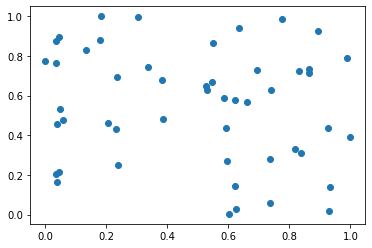

In [150]:
plt.scatter(x, y);

In [151]:
# Best Slope ---  xbar * yvar - mean(xybar) / xbar^2 - xbar*xbar^2

def calc_slope(xs,ys):
    m = ((np.mean(xs) * np.mean(ys)) - np.mean(xs*ys)) / ((np.mean(xs)**2) - (np.mean(xs**2)))
    
    return m

calc_slope(x,y)


-0.1366449739485433

In [152]:
# Best Intercept ---  c = ybar - slope * xbar

def best_fit(xs,ys):
    
    # use the slope function with intercept formula to return calculate slope and intercept from data points
    m = calc_slope(xs,ys)
    c = np.mean(ys) - m*np.mean(xs)
    
    return m, c

m, c = best_fit(x,y)
m, c

(-0.1366449739485433, 0.6136779047559533)

In [153]:
def reg_line(m, c, xs):
    line = [(m*x)+c for x in xs]
    return line
line = reg_line(m,c,x)

y = -0.0*x + 1.0


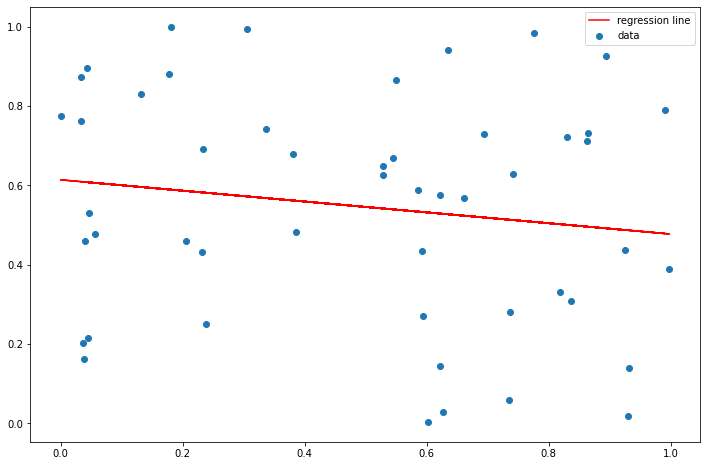

In [154]:
plt.figure(figsize=(12,8))
plt.scatter(x, y, label='data')
plt.plot(x, line, c='r', label='regression line')
plt.legend();

print(f"y = {round(m)}*x + {round(c)}")

In [155]:
def prediction(point):
    # prediction
    predict = (m*point) + c

    # print prediction
    print(f"Your X-value of {point}... results in a y-value of {predict}")

    # plot
    plt.figure(figsize=(12,8))
    plt.scatter(x, y, label='data')
    plt.scatter(point, y=predict, label='prediction', c='orange')
    plt.plot(x, line, c='r', label='regression line')
    plt.legend()
    return 

Your X-value of 24.0... results in a y-value of -2.665801470009086


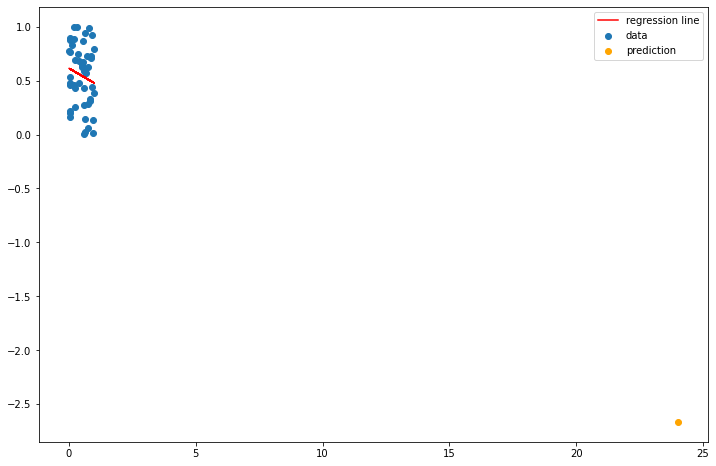

In [158]:
# Run this cell to make predictions :-)
point = input("Type a number for X to predict y:")
prediction(float(point))

# $R^2$ using Sk-learn
## Linear Regression

In [159]:
lr = LinearRegression()

lr.fit(x.reshape(-1,1), y.reshape(-1,1))

LinearRegression()

In [160]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=lr,
    X=x.reshape(-1,1),
    y=y.reshape(-1,1),
    return_train_score=True,
    cv=splitter
)

print("Train score: ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:  0.03604264447693998
Validation score: -0.36868829550376786


In [161]:
print(f"Sk-learn coef: {float(lr.coef_)}, ||| Manual coef: {m}")
print(f"Sk-learn intercept: {float(lr.intercept_)}, ||| Manual intercept: {c}")

Sk-learn coef: -0.13664497394854255, ||| Manual coef: -0.1366449739485433
Sk-learn intercept: 0.613677904755953, ||| Manual intercept: 0.6136779047559533


## Decision Tree

In [162]:
dt = DecisionTreeRegressor(max_depth=3)

dt.fit(x.reshape(-1,1), y.reshape(-1,1))

DecisionTreeRegressor(max_depth=3)

In [163]:
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=dt,
    X=x.reshape(-1,1),
    y=y.reshape(-1,1),
    return_train_score=True,
    cv=splitter
)

print("Train score: ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:  0.42332102058898174
Validation score: -0.6058908344987103


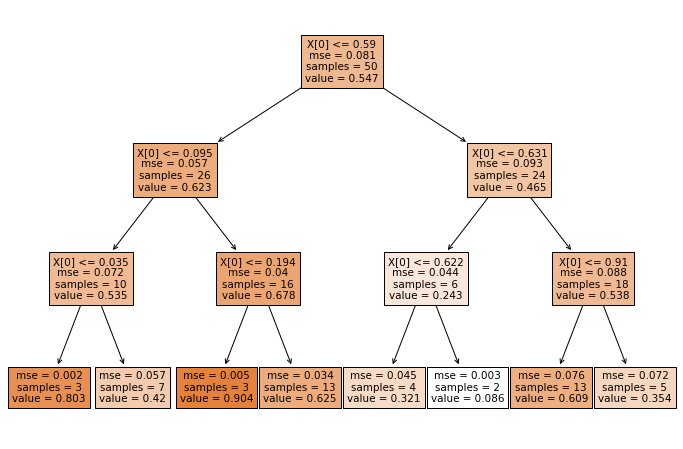

In [164]:
from sklearn import tree

plt.figure(figsize=(12,8))
tree.plot_tree(dt, filled=True);

# $R^2$ with Real Data
 [From Kaggle's Possum Dataset](https://www.kaggle.com/abrambeyer/openintro-possum)

In [182]:
df = pd.read_csv('./data/possum.csv')
df.dropna(inplace=True)

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      101 non-null    int64  
 1   site      101 non-null    int64  
 2   Pop       101 non-null    object 
 3   sex       101 non-null    object 
 4   age       101 non-null    float64
 5   hdlngth   101 non-null    float64
 6   skullw    101 non-null    float64
 7   totlngth  101 non-null    float64
 8   taill     101 non-null    float64
 9   footlgth  101 non-null    float64
 10  earconch  101 non-null    float64
 11  eye       101 non-null    float64
 12  chest     101 non-null    float64
 13  belly     101 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.8+ KB


In [209]:
x = df['belly'] # belly girth (cm)
y = df['totlngth'] # Total length (cm)

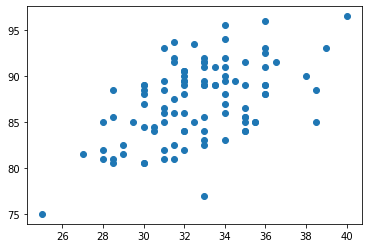

In [210]:
plt.scatter(x, y);

In [211]:
# Slope
calc_slope(x,y)

0.7701397205588087

In [212]:
# Best Intercept
m, c = best_fit(x,y)
m, c

(0.7701397205588087, 62.13301397205829)

In [213]:
def reg_line(m, c, xs):
    line = [(m*x)+c for x in xs]
    return line
line = reg_line(m,c,x)

y = 0.7701*x + 62.0


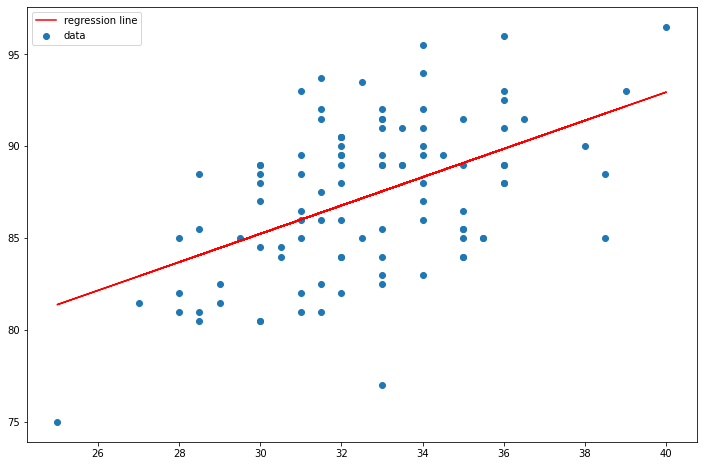

In [214]:
plt.figure(figsize=(12,8))
plt.scatter(x, y, label='data')
plt.plot(x, line, c='r', label='regression line')
plt.legend();

print(f"y = {round(m, 4)}*x + {round(c)}")

In [215]:
def prediction(point):
    # prediction
    predict = (m*point) + c

    # print prediction
    print(f"Your X-value of {point}... results in a y-value of {predict}")

    # plot
    plt.figure(figsize=(12,8))
    plt.scatter(x, y, label='data')
    plt.scatter(point, y=predict, label='prediction', c='orange')
    plt.plot(x, line, c='r', label='regression line')
    plt.legend()
    return 

Your X-value of 34.0... results in a y-value of 88.31776447105779


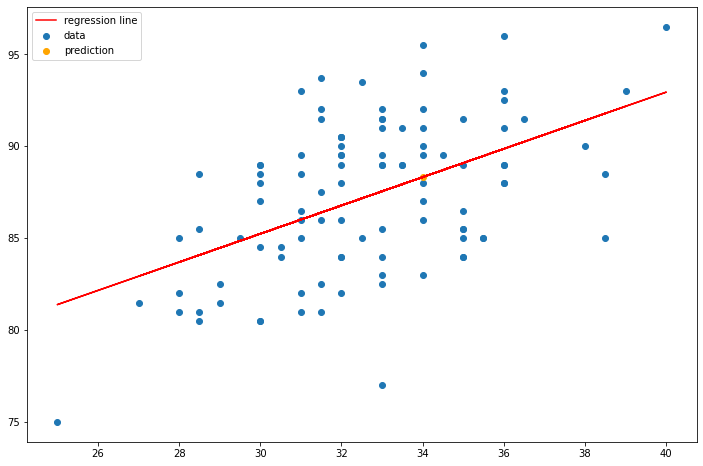

In [216]:
# Run this cell to make predictions :-)
point = input("Type a number for X to predict y:")
prediction(float(point))

# $R^2$ using Sk-learn
## Linear Regression

In [217]:
lr = LinearRegression()

lr.fit(np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1))

LinearRegression()

In [218]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=lr,
    X=np.array(x).reshape(-1, 1),
    y=np.array(y).reshape(-1, 1),
    return_train_score=True,
    cv=splitter
)

print("Train score: ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:  0.27176363951412547
Validation score: 0.12245288380641783


In [219]:
print(f"Sk-learn coef: {float(lr.coef_)}, ||| Manual coef: {m}")
print(f"Sk-learn intercept: {float(lr.intercept_)}, ||| Manual intercept: {c}")

Sk-learn coef: 0.770139720558882, ||| Manual coef: 0.7701397205588087
Sk-learn intercept: 62.133013972055906, ||| Manual intercept: 62.13301397205829


## Decision Tree

In [225]:
dt = DecisionTreeRegressor()

dt.fit(np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1))

DecisionTreeRegressor()

In [228]:
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

scores = cross_validate(
    estimator=dt,
    X=np.array(x).reshape(-1, 1),
    y=np.array(y).reshape(-1, 1),
    return_train_score=True,
    cv=splitter
)

print("Train score: ", scores["train_score"].mean())
print("Validation score:", scores["test_score"].mean())

Train score:  0.4821349795036484
Validation score: -0.009258434744738605


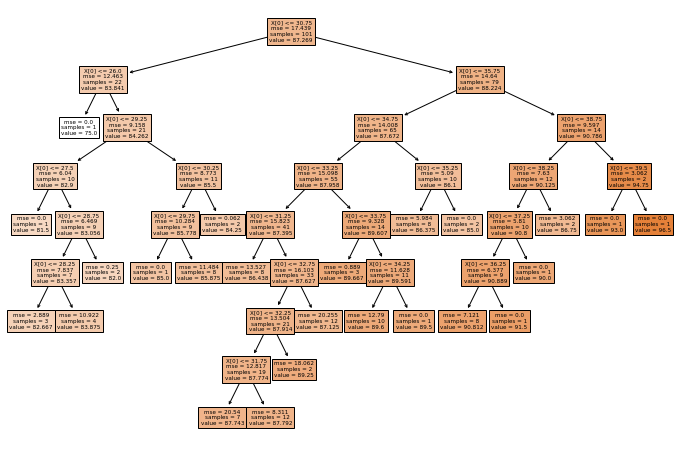

In [229]:
from sklearn import tree

plt.figure(figsize=(12,8))
tree.plot_tree(dt, filled=True);

In [232]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1))

rf.score(np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1))



<ipython-input-232-2b7e9ee42747>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1))


0.41017544134617057